# Corpse Inspection

In [1]:
import json
text = "For real.  To be honest, I replied to yours because I wanted to have a comment"

with open("corpse.json", "r") as json_file:
    corpse = json.load(json_file)

In [2]:
for i,v in enumerate(corpse):
    if text in v["text"]:
        print(i)
        break

NameError: name 'corpse' is not defined

In [16]:
len(corpse)

50000

# Synthdata Inspection

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [30]:
with open("synth_data.txt","r") as f:
    df = f.read().split("\n\n")

In [31]:
df_cleaned = []
for i in df:
    if i:
        try:
            entry = json.loads(i)
            assert len(entry['features']) == len(entry['scores'])
            assert type(entry['scores'][0]) != dict
            df_cleaned.append(entry)
        except:
            continue

In [32]:
with open("synth_data_testset.txt","w") as f:
    for i in df_cleaned[-1000:-1]:
        f.write(json.dumps(i))
        f.write("\n\n")

(array([6.8500e+02, 3.1000e+01, 8.4000e+02, 4.4250e+03, 3.7530e+03,
        6.5047e+04, 8.5820e+03, 8.2730e+03, 3.4520e+03, 4.1899e+04]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

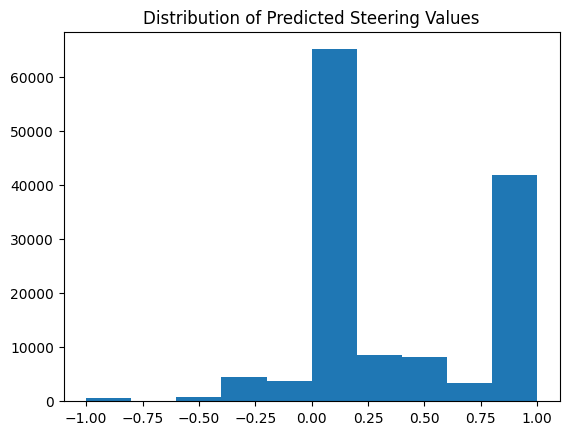

In [33]:
scores = []
for i in df_cleaned:
    scores += i['scores']
plt.title("Distribution of Predicted Steering Values")
plt.hist(scores)

(array([17257.,   636.,   959.,   702.,   579.,  1278.,   735.,   679.,
          966.,  1978.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

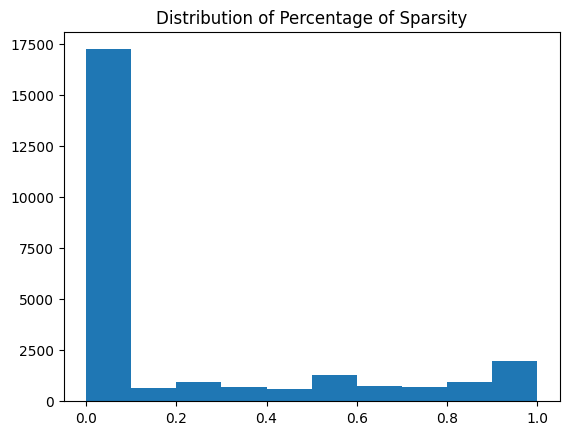

In [8]:
# sparsity
sparsity = [np.sum(np.array(i['scores'])==0.0)/len(i['scores']) for i in df_cleaned]
plt.title("Distribution of Percentage of Sparsity")
plt.hist(sparsity)

In [9]:
dis = [i for i in df_cleaned if sum(np.array(i['scores'])==0)==0]
len(dis)

17257

In [34]:
features = []
for i in df_cleaned:
    features += i['feature_ids']

In [35]:
unique_values = np.unique(features,return_counts = True)
unique_values[0][unique_values[1].argsort()[:10]]

array([698, 734, 709, 719,  87, 112, 675, 679, 187, 445])

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

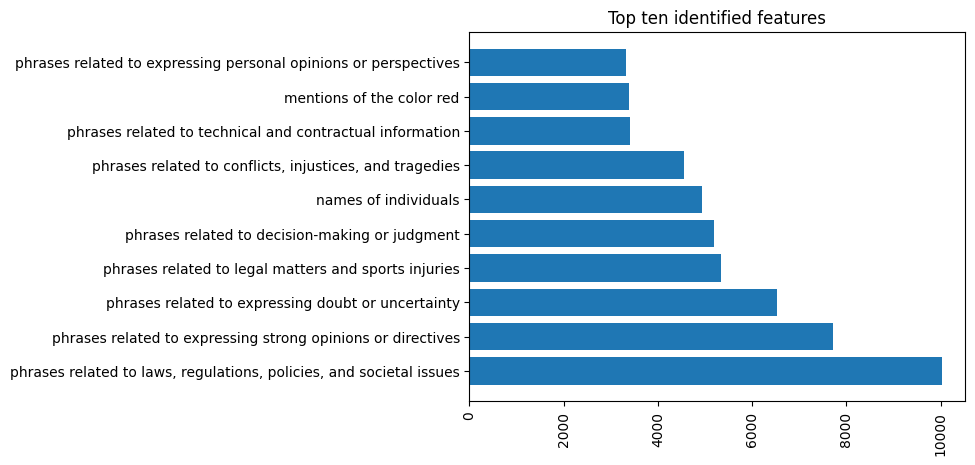

In [148]:
plt.figure()
plt.title("Top ten identified features")
plt.barh(unique_values[0][unique_values[1].argsort()[::-1][:10]],unique_values[1][unique_values[1].argsort()[::-1][:10]])
plt.xticks(rotation=90)


In [81]:
unique_values[1][unique_values[1].argsort()[:10]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
with open('synth_data_v2.json', 'w') as f:
    json.dump(df, f)